In [1]:
import os
os.chdir(r'D:\_GitHubSpace\PythonStudy')

* SJISのCSVファイルを読み込む

In [2]:
import csv
with open('Japan-population.csv', 'r', encoding='shift-jis') as f:
    data = list(csv.reader(f))
print(type(data), len(data), len(data[1]))
print(data[0]) 
print(data[1])

def gen_year1st(d):
    year = 0
    for l in range(len(d)):
        line = d[l]
        if year != line[2]:
            year = line[2]
            yield l

def convert_population_by_age(d):
    ages = 18
    pp_age = [None]*ages
    for i in range(ages):
        pp_age[i] = []
        
    for l in gen_year1st(d):
        for i in range(ages):
            pp_age[i].append(d[l+i][4])
    return pp_age

pp_age = convert_population_by_age(data[1:])
print(pp_age[0])
print(pp_age[1])

<class 'list'> 396 7
['元号', '和暦（年）', '西暦（年）', '年齢5歳階級', '人口（総数）', '人口（男）', '人口（女）']
['大正', '9', '1920', '総数', '55963053', '28044185', '27918868']
['55963053', '59736822', '64450005', '69254148', '73075071', '71998104', '84114574', '90076594', '94301623', '99209137', '104665171', '111939643', '117060396', '121048923', '123611167', '125570246', '126925843', '127767994', '128057352', '127094745']
['7457715', '8264583', '9011135', '9328501', '9128009', '9250418', '11350580', '9381512', '7964828', '8241607', '8907564', '10000607', '8515416', '7459263', '6492897', '5995254', '5904098', '5578087', '5296748', '4987706']


* なんか力技っぽいので、違う方法でやってみる

In [3]:
def read_line(filename):
    """１行毎にカンマ区切りで分割してリストを返す"""
    with open(filename, 'r', encoding='shift-jis') as f:
        while True:
            line = f.readline()
            if not line:
                break
            yield [x.strip() for x in line.split(',')]
            
def read_line_by_year(filename):
    """西暦カラム変化を検知してNoneを返す"""
    year = None
    for d in read_line(filename):
        if year != d[2]:
            year = d[2]
            yield None
        yield d

def read_year_block(filename):
    """西暦カラムが同一のブロック単位のリストを返す"""
    block = []
    for d in read_line_by_year(filename):
        if d:
            block.append(d)
        else:
            if block:
                yield block
            block = []
            
# 上記generator関数の読み込み動作を確かめてみる
for d in read_year_block('Japan-population.csv'):
    print(len(d), d[0])

1 ['"元号"', '"和暦（年）"', '"西暦（年）"', '"年齢5歳階級"', '"人口（総数）"', '"人口（男）"', '"人口（女）"']
19 ['"大正"', '9', '1920', '"総数"', '55963053', '28044185', '27918868']
19 ['"大正"', '14', '1925', '"総数"', '59736822', '30013109', '29723713']
19 ['"昭和"', '5', '1930', '"総数"', '64450005', '32390155', '32059850']
19 ['"昭和"', '10', '1935', '"総数"', '69254148', '34734133', '34520015']
19 ['"昭和"', '15', '1940', '"総数"', '73075071', '36540561', '36534510']
19 ['"昭和"', '20', '1945', '"総数"', '71998104', '33894059', '38104045']
19 ['"昭和"', '25', '1950', '"総数"', '84114574', '41241192', '42873382']
19 ['"昭和"', '30', '1955', '"総数"', '90076594', '44242657', '45833937']
19 ['"昭和"', '35', '1960', '"総数"', '94301623', '46300445', '48001178']
19 ['"昭和"', '40', '1965', '"総数"', '99209137', '48692138', '50516999']
19 ['"昭和"', '45', '1970', '"総数"', '104665171', '51369177', '53295994']
19 ['"昭和"', '50', '1975', '"総数"', '111939643', '55090673', '56848970']
19 ['"昭和"', '55', '1980', '"総数"', '117060396', '57593769', '59466627']
19 ['"昭和"'

* 作った関数を使って、年齢別リストに格納する
    + 

In [4]:
ID_sum = 0
ID_man = 1
ID_woman = 2

def make_population_by_age():
    pp_year = []
    ages = 19
    pp_name = [None] * ages
    pp_data = 3 * [None]
    for i in range(3):
        pp_data[i] = [None] * ages
        for j in range(ages):
            pp_data[i][j] = []
        
    for blk in read_year_block('Japan-population.csv'):
        if len(blk) < ages:
            #print(blk)
            continue
        pp_year.append(int(blk[0][2]))
        for i in range(3):
            for j in range(ages):
                pp_data[i][j].append(int(blk[j][4+i]))
                pp_name[j]=blk[j][3]
    return pp_year, pp_name, pp_data

pp_year, pp_name, pp_data = make_population_by_age()
print(pp_year)
print(pp_name)
print(pp_data[ID_sum][0])
print(pp_data[ID_sum][1])

[1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]
['"総数"', '"0〜4歳"', '"5〜9歳"', '"10〜14歳"', '"15〜19歳"', '"20〜24歳"', '"25〜29歳"', '"30〜34歳"', '"35〜39歳"', '"40〜44歳"', '"45〜49歳"', '"50〜54歳"', '"55〜59歳"', '"60〜64歳"', '"65〜69歳"', '"70〜74歳"', '"75〜79歳"', '"80〜84歳"', '"85〜89歳"']
[55963053, 59736822, 64450005, 69254148, 73075071, 71998104, 84114574, 90076594, 94301623, 99209137, 104665171, 111939643, 117060396, 121048923, 123611167, 125570246, 126925843, 127767994, 128057352]
[7457715, 8264583, 9011135, 9328501, 9128009, 9250418, 11350580, 9381512, 7964828, 8241607, 8907564, 10000607, 8515416, 7459263, 6492897, 5995254, 5904098, 5578087, 5296748]


---
* matplotlibの基本的な使い方
https://qiita.com/Morio/items/d75159bac916174e7654
* Matplotlibの使い方
https://qiita.com/youichiro/items/8c558fa27ea8860978a8
* matplotlibの色指定や線種指定
https://sites.google.com/site/tipsastrotool/home/matplotlib#color

* グラフを描く

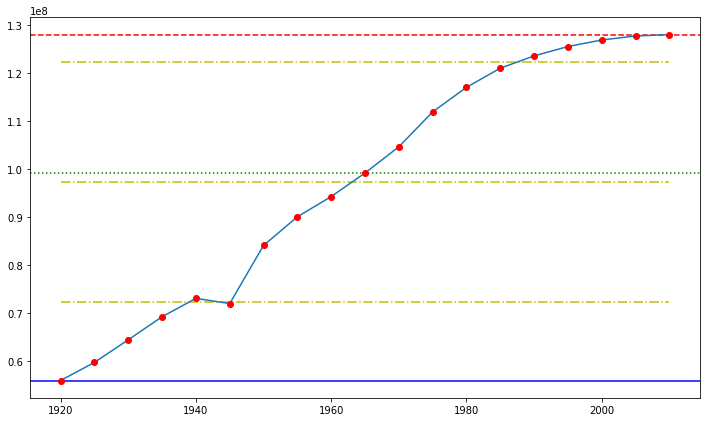

In [5]:
%matplotlib inline
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.figure(figsize=(12,7))
xmin, xmax = pp_year[0], pp_year[len(pp_year)-1]

d = pp_data[ID_sum][0] # ０番の総数を対象
plt.axhline(np.min(d),    ls='-',  c='b')
plt.axhline(np.max(d),    ls='--', c='r')
plt.axhline(np.median(d), ls=':',  c='g')

lines = [np.mean(d), np.mean(d)-np.std(d), np.mean(d)+np.std(d)]
plt.hlines(lines, xmin, xmax, linestyles='-.',  colors='y')

x = np.linspace(xmin, xmax, len(d))
plt.plot(x, d)
plt.plot(x, d, 'ro')
plt.show()

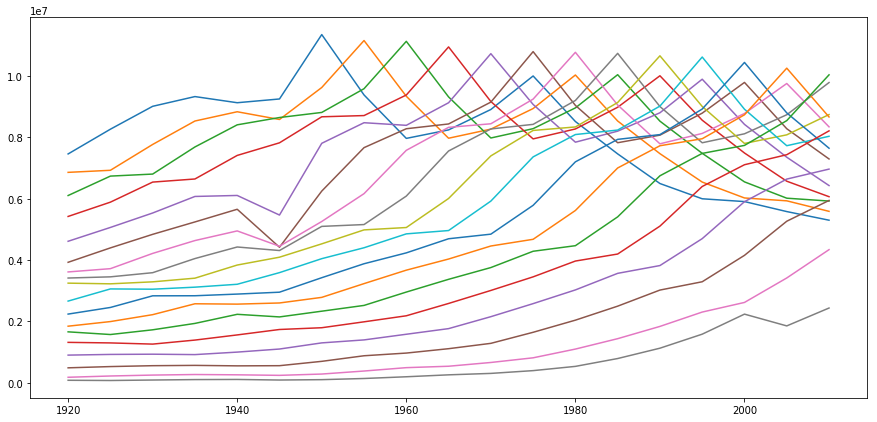

In [6]:
plt.figure(figsize=(15,7))
xmin, xmax = pp_year[0], pp_year[len(pp_year)-1]
for d in pp_data[ID_sum][1:]: # ０番の総数を除く
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d)
    #plt.plot(x, d, 'o')
plt.show()

name= 総数


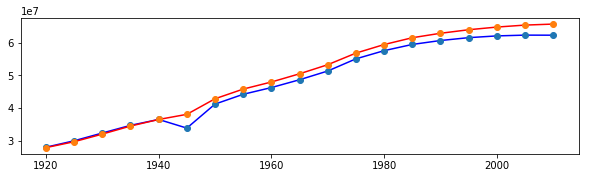

name= 0〜4歳


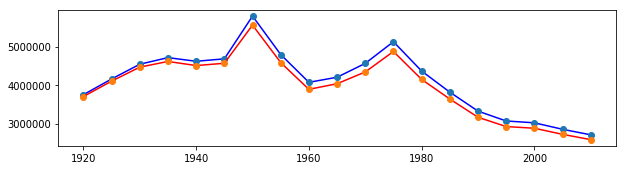

name= 5〜9歳


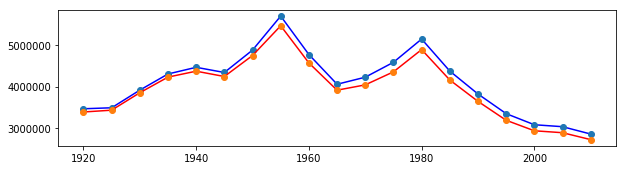

name= 10〜14歳


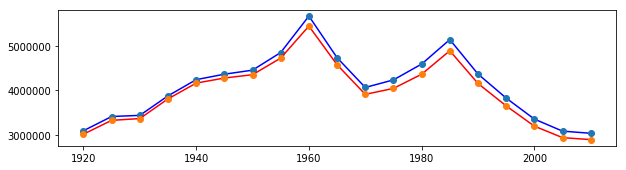

name= 15〜19歳


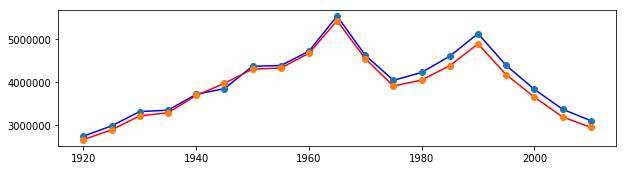

name= 20〜24歳


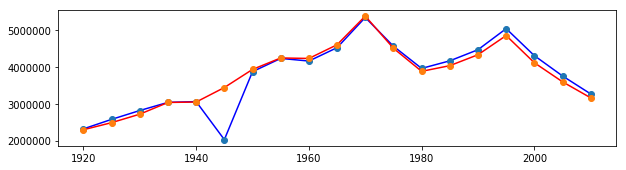

name= 25〜29歳


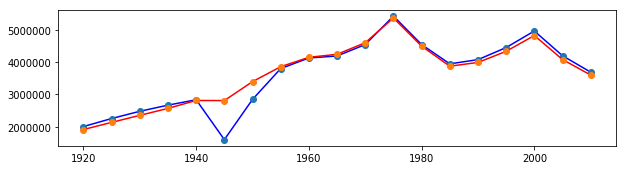

name= 30〜34歳


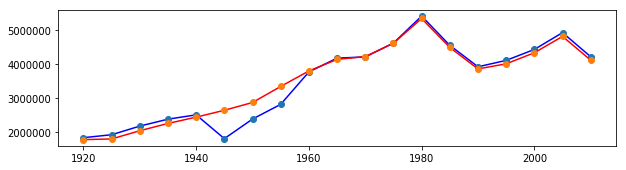

name= 35〜39歳


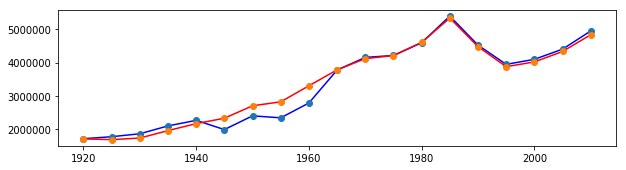

name= 40〜44歳


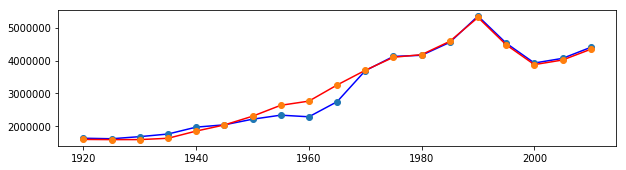

name= 45〜49歳


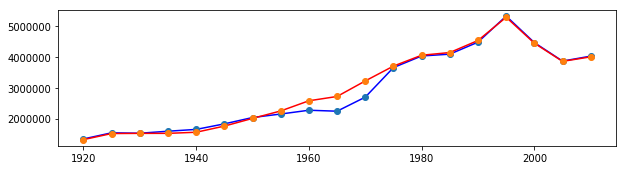

name= 50〜54歳


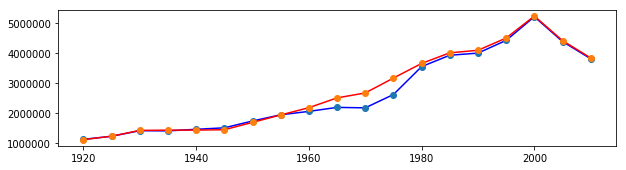

name= 55〜59歳


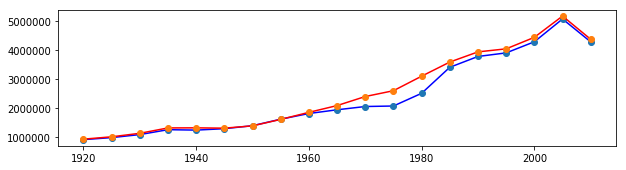

name= 60〜64歳


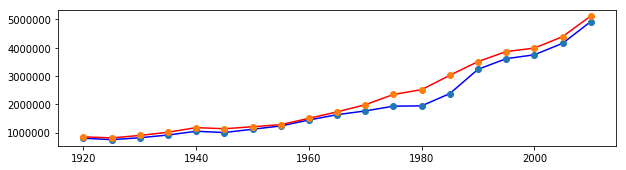

name= 65〜69歳


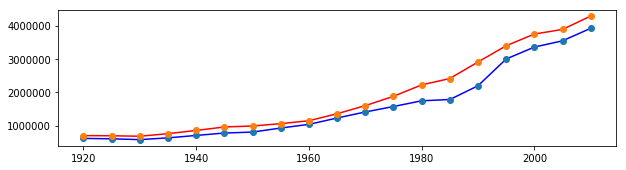

name= 70〜74歳


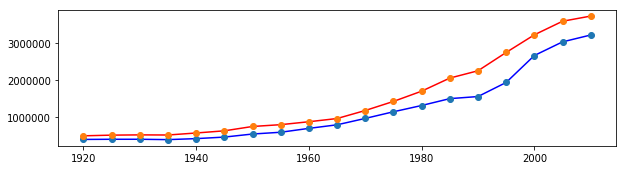

name= 75〜79歳


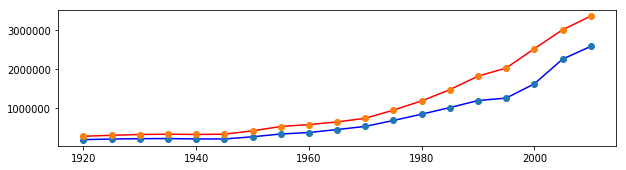

name= 80〜84歳


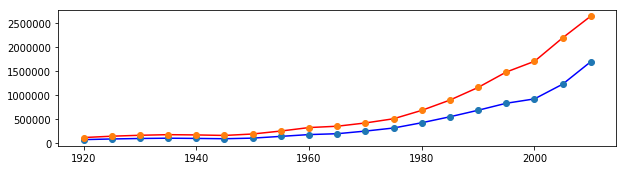

name= 85〜89歳


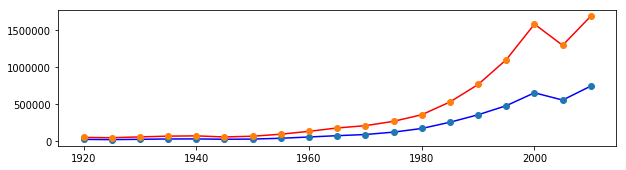

In [7]:
pp_man = pp_data[ID_man]
pp_woman = pp_data[ID_woman]
xmin, xmax = pp_year[0], pp_year[len(pp_year)-1]
for i in range(len(pp_man)):
    print('name=', pp_name[i].strip('"'))
    plt.figure(figsize=(10,2.5))
    d = pp_man[i]
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d, c='b')
    plt.plot(x, d, 'o')
    d = pp_woman[i]
    plt.plot(x, d, c='r')
    plt.plot(x, d, 'o')
    plt.show()

* 差分を取って表示する（人口増減）

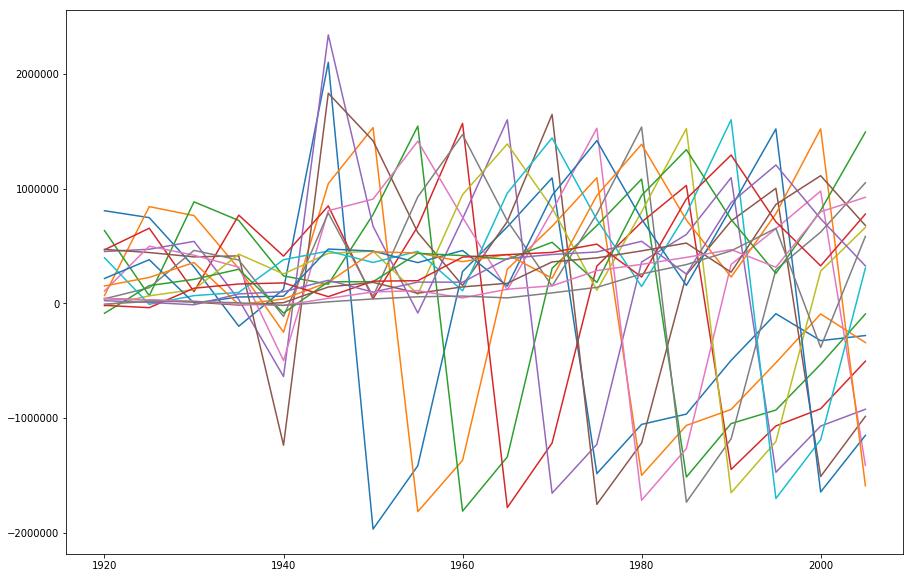

In [8]:
plt.figure(figsize=(15,10))
xmin, xmax = pp_year[0], pp_year[len(pp_year)-2]
for d in pp_data[ID_sum][1:]: # ０番の総数を除く
    d = np.diff(d)
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d)
    #plt.plot(x, d, 'o')
plt.show()

* 差分を取って表示する（人口減が少ない年齢層だけ）

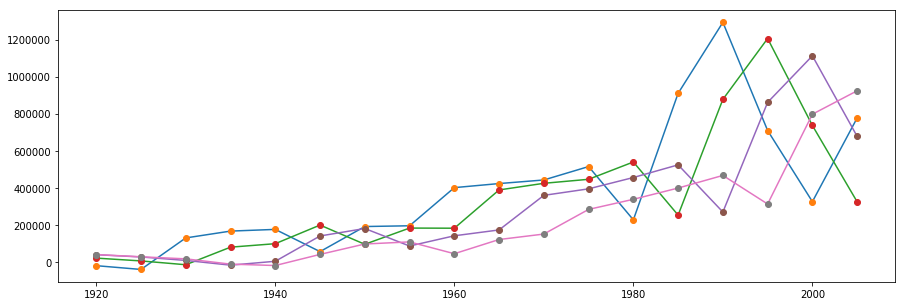

In [9]:
plt.figure(figsize=(15,5))
xmin, xmax = pp_year[0], pp_year[len(pp_year)-2]
for d in pp_data[ID_sum][1:]: # ０番の総数を除く
    d = np.diff(d)
    if np.min(d) < -50000: # 人口減が大きい所は除く
        continue
    x = np.linspace(xmin, xmax, len(d))
    plt.plot(x, d)
    plt.plot(x, d, 'o')
plt.show()

* 差分を取って表示する（人口減し続けた所だけ）

* Jupyter (iPython) Notebookを使ってプレゼンテーション資料を作る方法
https://myenigma.hatenablog.com/entry/2016/05/22/160209

* Jupyter Notebook を使ってみよう
https://pythondatascience.plavox.info/python%E3%81%AE%E9%96%8B%E7%99%BA%E7%92%B0%E5%A2%83/jupyter-notebook%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86

* Jupyter事始め
https://qiita.com/taka4sato/items/2c3397ff34c440044978#jupyter%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9